In [5]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os

from matplotlib import pyplot as plt


# LCLS Injector
---

# Solenoid Set up

In [2]:
from gpt.maps import get_gdf_header
from gpt.maps import Map2D_B

solenoid_centers = [0.17321817913611792, 4]

sol1_map = 'fields/solenoid_12cm_distance.gdf'
get_gdf_header(sol1_map)

sol1 = Map2D_B('sol1', sol1_map, column_names={'R':'r', 'Z':'z', 'Br':'Br', 'Bz':'Bz'})

sol2_map = 'fields/wifel_solenoid.gdf'
get_gdf_header(sol1_map)

sol2 = Map2D_B('sol12', sol2_map, column_names={'R':'r', 'Z':'z', 'Br':'Br', 'Bz':'Bz'})

# Cavities

In [3]:
from gpt.maps import Map25D_TM

swifel_map = 'fields/swifel_gun_7_cm_gap_2_cm_pipe.gdf'
swifel = Map25D_TM('swifel', swifel_map, column_names={'R':'r', 'Z':'z', 'Er':'Er', 'Ez':'Ez', 'Bphi':'Bphi'}, frequency=0.185916496e9)

c9_map = 'fields/tesla_9cell_orig.gdf'

cavity9_centers = [1.9471379962147757, 6, 7.3836, 8.767199999999999, 10.1508, 11.5344, 12.918, 14.301599999999997,15.6852]
cavity9_maxe = [13.745260538205162, 11.946233551708557, 25.384865363246163, 12.152605998968443, 8.918661237543773, 32, 32, 32, 32]


# Lattice

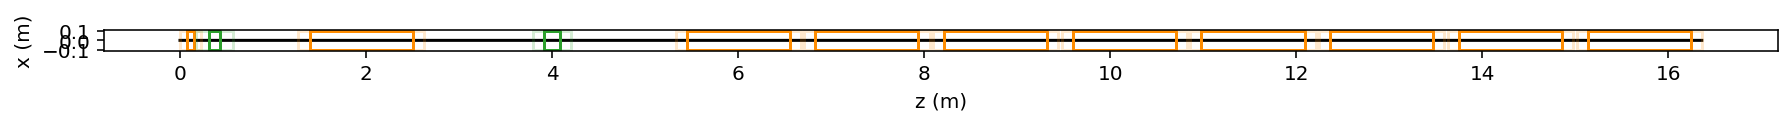

In [6]:
from gpt.element import Lattice

inj = Lattice('lcls-injector')
inj.add(swifel, ds=0)
inj.add(sol1, ds=solenoid_centers[0], ref_element='beg')
inj.add(sol2, ds=solenoid_centers[1], ref_element='beg', element_origin='center')


for ii in range(9):
    inj.add(Map25D_TM(f'c9{ii+1}', c9_map, column_names={'R':'r', 'Z':'z', 'Er':'Er', 'Ez':'Ez', 'Bphi':'Bphi'}, frequency=1.3e9, scale=cavity9_maxe[ii]), 
            ds=cavity9_centers[ii], ref_element='beg', element_origin='center')

plt.figure(figsize=(15,4))
inj.plot_floor();


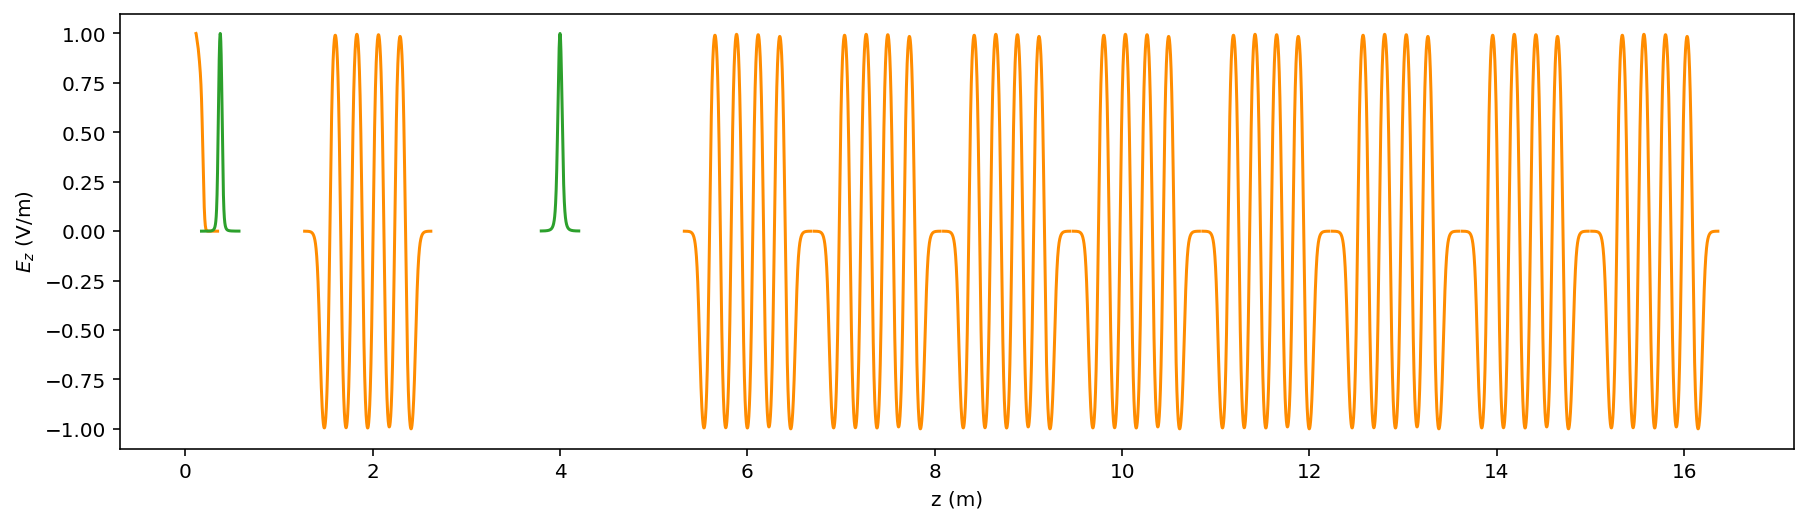

In [5]:
plt.figure(figsize=(15,4))
inj.plot_field_profile();

In [10]:
inj.write_gpt_lines(output_file='gpt.in');

In [ ]:
# NOTE: make sure the include space_charge=1 and cathode=1 
# in your settings in order to turn those features on in GPT